In [82]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

In [83]:
start = datetime.datetime (2020,1,1)
end = datetime.datetime(2022,1,1)
CD_PROJEKT = data.DataReader('CDR','stooq',start,end)
CI_GAMES = data.DataReader('CIG','stooq',start,end)
METAVERSUM = data.DataReader('MET','stooq',start,end)

In [84]:
dataForm = data.DataReader(['CDR','CIG','MET'],'stooq',start,end)

In [85]:
tickers = ['CD PROJEKT','CI GAMES', 'METAVERSUM']

In [86]:
games_companies_stocks = pd.concat([CD_PROJEKT,CI_GAMES,METAVERSUM],axis=1,keys=tickers)

In [87]:
games_companies_stocks.columns.names = ['Company','Stock Info']

In [88]:
games_companies_stocks.head()

Company    CD PROJEKT                                CI GAMES           \
Stock Info       Open    High     Low   Close Volume     Open     High   
Date                                                                     
2021-12-31     24.877  25.096  24.777  25.036  32881  1.76731  1.78192   
2021-12-30     24.926  25.126  24.729  25.036  67637  1.73077  1.77092   
2021-12-29     24.567  24.926  24.293  24.877  52556  1.75269  1.75992   
2021-12-28     24.278  24.817  24.109  24.518  46442  1.73808  1.76731   
2021-12-27     23.680  24.408  23.555  24.238  36908  1.71615  1.74169   

Company                                  METAVERSUM                          \
Stock Info      Low    Close      Volume       Open    High     Low   Close   
Date                                                                          
2021-12-31  1.74546  1.77462   9088918.8     61.428  61.990  61.409  61.596   
2021-12-30  1.72346  1.74538   5704652.2     61.971  62.414  61.625  61.685   
2021-12-29  1.70885  1.71615   6358071.2     61.714  62.177  61.507  61.783   
2021-12-28  1.72346  1.75269  10376861.3     61.458  62.395  61.418  61.714   
2021-12-27  1.69792  1.73077  11012686.1     61.073  61.680  60.748  61.596   

Company              
Stock Info   Volume  
Date                 
2021-12-31  2204271  
2021-12-30  2265513  
2021-12-29  2171503  
2021-12-28  3716198  
2021-12-27  2996980

In [89]:
games_companies_stocks.tail()

Company    CD PROJEKT                                 CI GAMES           \
Stock Info       Open    High     Low   Close  Volume     Open     High   
Date                                                                      
2020-01-08     16.935  16.994  16.732  16.935   20449  2.01654  2.08523   
2020-01-07     17.228  17.228  16.702  16.935   32920  1.95362  2.01654   
2020-01-06     17.576  17.636  17.168  17.285   45359  1.90200  1.93646   
2020-01-03     17.051  17.987  16.935  17.694  119870  1.92485  1.94200   
2020-01-02     17.344  17.344  16.891  17.168   33400  1.93646  1.94200   

Company                                  METAVERSUM                          \
Stock Info      Low    Close      Volume       Open    High     Low   Close   
Date                                                                          
2020-01-08  2.01654  2.05092  11526507.2     46.861  47.863  46.834  47.188   
2020-01-07  1.95362  2.01654   9265445.8     46.443  46.996  46.196  46.698   
2020-01-06  1.90200  1.91338   6679514.4     46.097  46.460  45.815  46.387   
2020-01-03  1.91338  1.91923   3402764.3     46.425  46.575  46.063  46.515   
2020-01-02  1.90831  1.94200   5116057.7     46.688  47.062  46.483  46.996   

Company               
Stock Info    Volume  
Date                  
2020-01-08  10852221  
2020-01-07   7225811  
2020-01-06   3593425  
2020-01-03   5669982  
2020-01-02   4851183

In [90]:
games_companies_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Company
CD PROJEKT    25.03600
CI GAMES       2.13108
METAVERSUM    65.15400
dtype: float64

In [91]:
games_companies_stocks.xs(key='Close',axis=1,level='Stock Info').min()

Company
CD PROJEKT     3.161000
CI GAMES       0.779077
METAVERSUM    21.614000
dtype: float64

In [92]:
games_companies_stocks.xs(key='Open',axis=1,level='Stock Info').max()

Company
CD PROJEKT    24.92600
CI GAMES       2.14254
METAVERSUM    65.02700
dtype: float64

In [93]:
games_companies_stocks.xs(key='Close',axis=1,level='Stock Info').min()

Company
CD PROJEKT     3.161000
CI GAMES       0.779077
METAVERSUM    21.614000
dtype: float64

In [94]:
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline


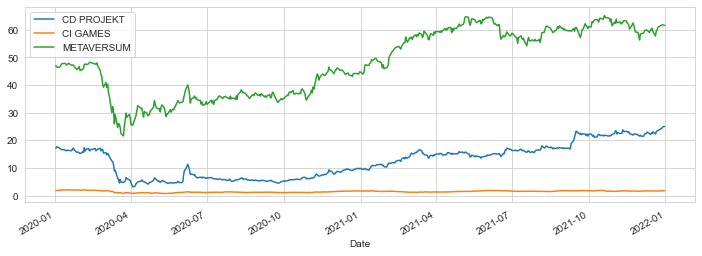

In [95]:
for tick in tickers:
    games_companies_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

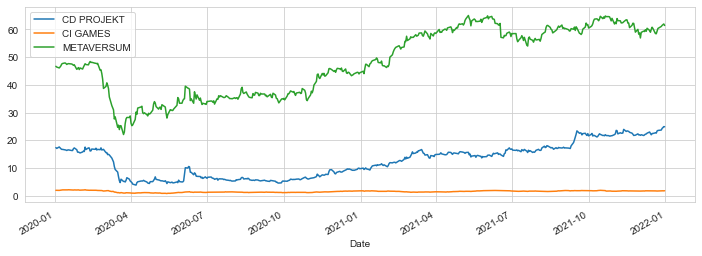

In [96]:
for tick in tickers:
    games_companies_stocks[tick]['Open'].plot(figsize=(12,4),label=tick)
plt.legend()

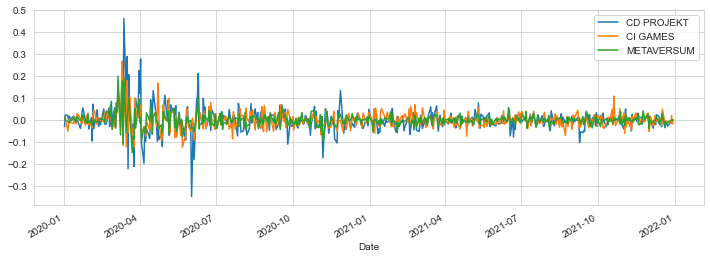

In [97]:
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' Return'] = games_companies_stocks[tick]['Close'].pct_change()
    returns[tick+' Return'].plot(figsize=(12,4),label=tick)
plt.legend()

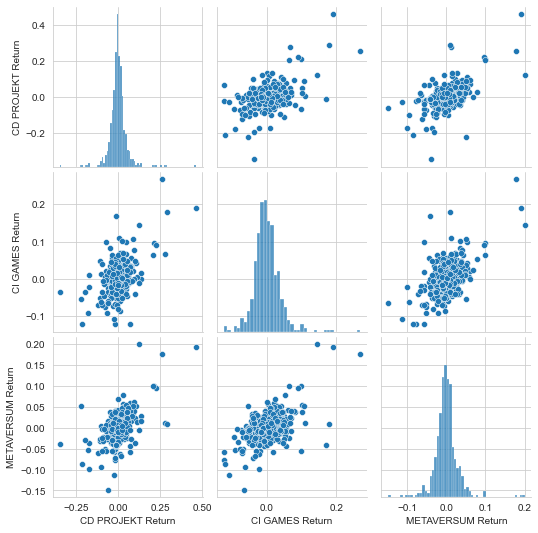

In [98]:
sns.pairplot(returns[1:])